In [1]:
# import numpy, pandas, seaborn, matplotlib, sklearn just because
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score ,mean_squared_error, roc_curve, roc_auc_score, classification_report, r2_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Cleaning

In [2]:
df = pd.read_csv('8 31 covid cases vs 2016 election voting.csv')

In [3]:
df.head()

,countyFIPS,County Name,State,stateFIPS,8/31/2020 cases,population 2020,cases/population,high cases/population(>2.5%),Votes,Democratic,...,Adults 65 and Older Living in Poverty,population 2016,Poverty.Rate.below.federal.poverty.threshold,Median Age,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,1001,Autauga County,AL,1,1442,55869,0.0258,1,24661.0,0,...,8.75,52077,10.45,36.2,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,Baldwin County,AL,1,4545,223234,0.0204,0,94090.0,0,...,5.20,177131,12.05,41.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1005,Barbour County,AL,1,757,24686,0.0307,1,10390.0,0,...,21.30,28560,24.85,38.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1007,Bibb County,AL,1,554,22394,0.0247,0,8748.0,0,...,12.40,22189,12.25,38.3,NaN,NaN,NaN,NaN,NaN,NaN
4,1009,Blount County,AL,1,1287,57826,0.0223,0,25384.0,0,...,10.80,57063,12.20,38.3,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,countyFIPS,stateFIPS,8/31/2020 cases,population 2020,cases/population,high cases/population(>2.5%),Votes,Democratic,Rep Margin 2016,Republicans 2016,...,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,population 2016,Poverty.Rate.below.federal.poverty.threshold,Median Age,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
count,3112.000000,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3.111000e+03,3112.000000,3112.000000,3111.000000,...,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,0.0,0.0,0.0,0.0,0.0
mean,30641.704370,30.538560,1906.497429,1.052358e+05,0.014407,0.154563,4.176518e+04,0.156170,31.919109,63.608655,...,24.858644,11.517063,9.781048e+04,15.465071,39.907262,NaN,NaN,NaN,NaN,NaN
std,14984.713409,14.965334,8139.719062,3.349246e+05,0.012778,0.361546,1.134234e+05,0.363074,30.817815,15.619852,...,11.874050,5.430024,3.124777e+05,6.342830,4.868391,NaN,NaN,NaN,NaN,NaN
min,1001.000000,1.000000,0.000000,8.600000e+01,0.000000,0.000000,6.400000e+01,0.000000,-88.724525,4.122067,...,0.000000,0.000000,8.100000e+01,0.000000,21.700000,NaN,NaN,NaN,NaN,NaN
25%,19036.500000,19.000000,89.000000,1.113025e+04,0.005800,0.000000,4.837000e+03,0.000000,14.866991,54.947224,...,16.450000,7.700000,1.127150e+04,11.000000,37.100000,NaN,NaN,NaN,NaN,NaN
50%,29206.000000,29.000000,299.500000,2.616300e+04,0.010800,0.000000,1.094800e+04,0.000000,38.217390,66.715489,...,23.800000,10.300000,2.600250e+04,14.700000,39.900000,NaN,NaN,NaN,NaN,NaN
75%,46003.500000,46.000000,990.500000,6.857625e+04,0.019300,0.000000,2.880700e+04,0.000000,54.602295,75.056740,...,31.750000,14.162500,6.620900e+04,18.950000,42.800000,NaN,NaN,NaN,NaN,NaN
max,56045.000000,56.000000,241768.000000,1.003911e+07,0.143400,1.000000,2.652072e+06,1.000000,91.636364,95.272727,...,79.650000,45.500000,9.801950e+06,50.600000,62.500000,NaN,NaN,NaN,NaN,NaN


In [5]:
# assigning region to counties based off of list of states
northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
midwest = ['IN','IL','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
south = ['DE','DC','FL','GA','MD','NC','SC','VA','WV','AL','KY','MS','TN','AR','LA','OK','TX']
west = ['AZ','CO','ID','NM','MT','UT','NV','WY','AK','CA','HI','OR','WA']

# function to assign regions to states
def get_region(region):
    if region in northeast:
        return 'northeast'
    elif region in midwest:
        return 'midwest'
    elif region in south:
        return 'south'
    elif region in west:
        return 'west'


# create region column
df['region'] = df['State'].apply(lambda x: get_region(x))

In [6]:
df=pd.concat([df, pd.get_dummies(df.region)], axis=1)

In [7]:
df.columns= df.columns.str.lower()

In [8]:
df = df.rename(columns = {"at least bachelors's degree":"at least bachelors degree"})
df = df.rename(columns = {"poverty.rate.below.federal.poverty.threshold":"poverty rate below federal poverty threshold"})
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   countyfips                                    3112 non-null   int64  
 1   county_name                                   3112 non-null   object 
 2   state                                         3112 non-null   object 
 3   statefips                                     3112 non-null   int64  
 4   8/31/2020_cases                               3112 non-null   int64  
 5   population_2020                               3112 non-null   int64  
 6   cases/population                              3112 non-null   float64
 7   high_cases/population(>2.5%)                  3112 non-null   int64  
 8   votes                                         3111 non-null   float64
 9   democratic                                    3112 non-null   i

In [9]:
df = df[['cases/population', 'voter_turnout','less_than_high_school_diploma','at_least_high_school_diploma','at_least_bachelors_degree',
         'graduate_degree','school_enrollment','median_earnings_2010','white_(not_latino)_population','african_american_population','native_american_population',
         'asian_american_population','other_race_or_races','latino_population','children_under_6_living_in_poverty','adults_65_and_older_living_in_poverty',
         'population_2016','poverty_rate_below_federal_poverty_threshold','median_age','northeast','south','west','democratic']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   cases/population                              3112 non-null   float64
 1   voter_turnout                                 3112 non-null   float64
 2   less_than_high_school_diploma                 3112 non-null   float64
 3   at_least_high_school_diploma                  3112 non-null   float64
 4   at_least_bachelors_degree                     3112 non-null   float64
 5   graduate_degree                               3112 non-null   float64
 6   school_enrollment                             3112 non-null   float64
 7   median_earnings_2010                          3112 non-null   float64
 8   white_(not_latino)_population                 3112 non-null   float64
 9   african_american_population                   3112 non-null   f

# Modeling

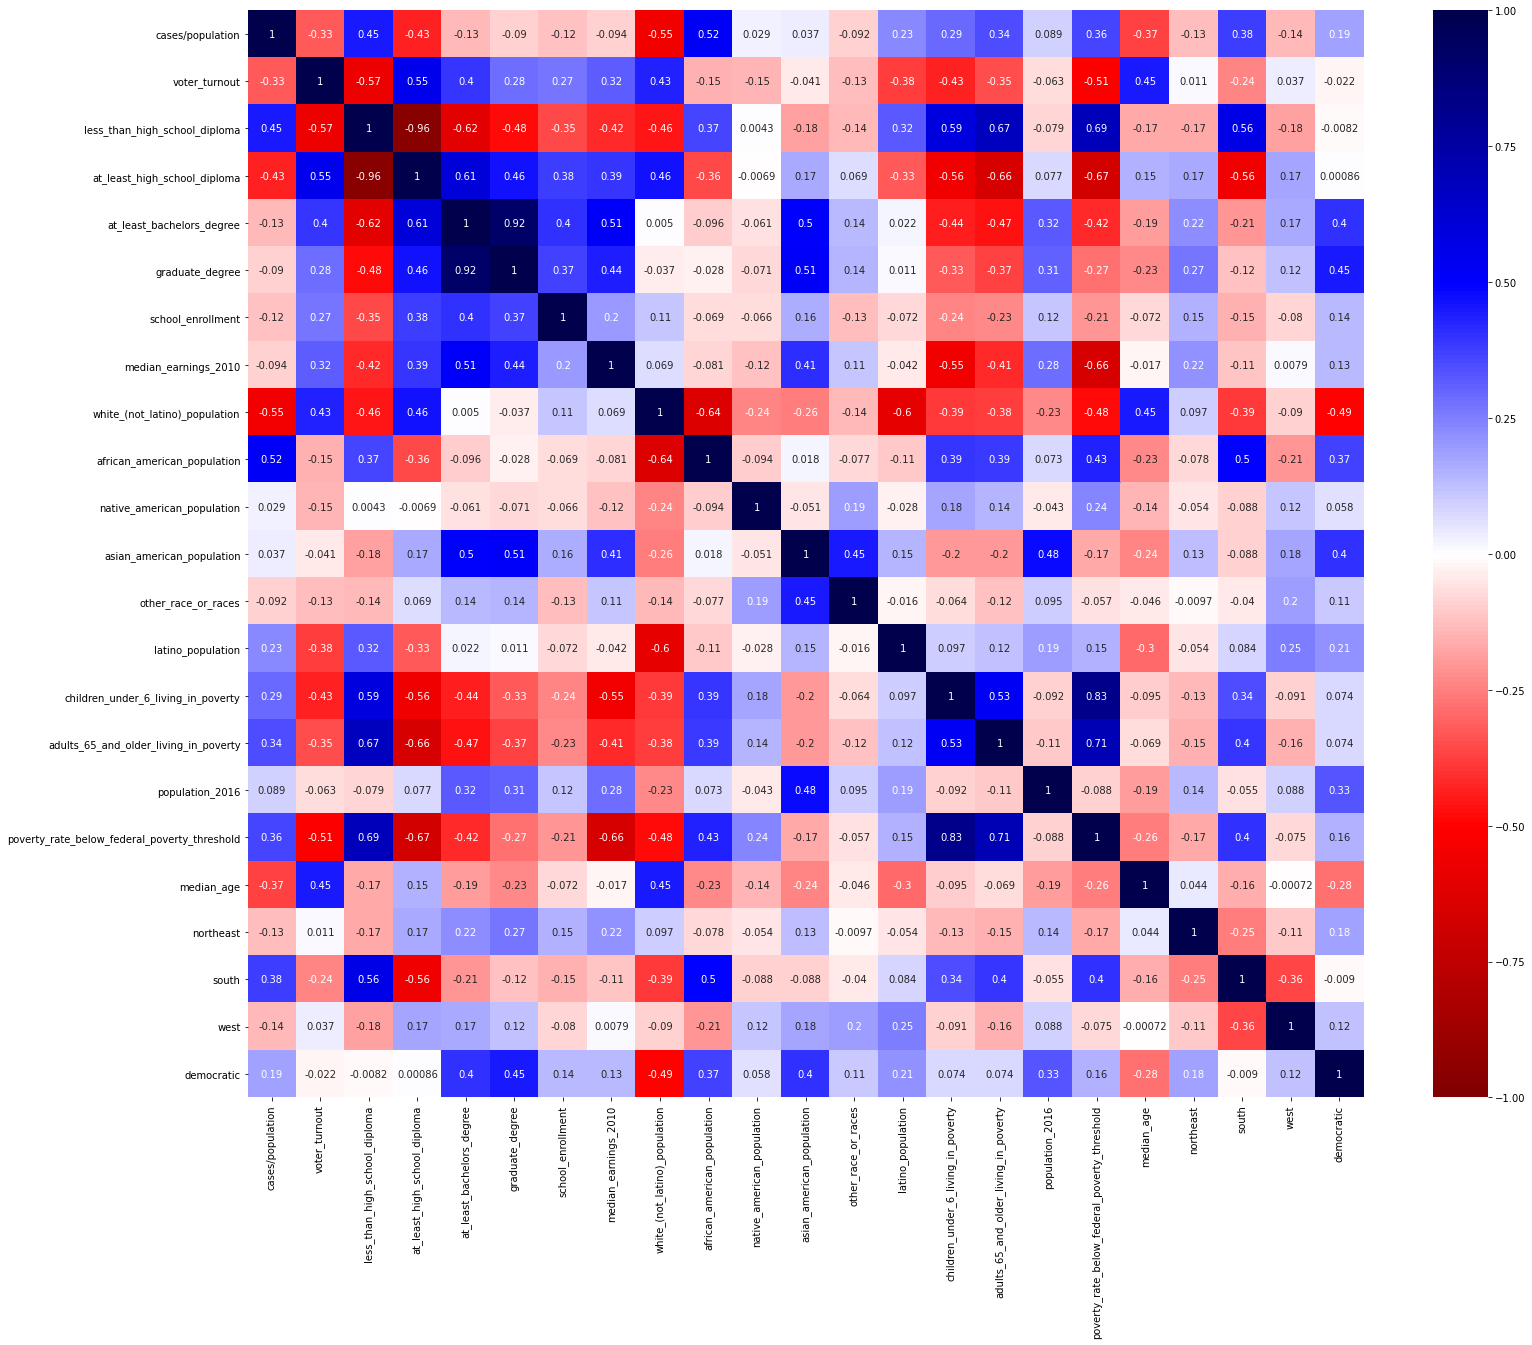

In [11]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1);

In [12]:
X = df.iloc[:, :22]
    # everything
y = df.iloc[:, -1]

In [13]:
X_norm = (X-np.min(X))/(np.max(X)-np.min(X)).values

In [14]:
X_norm.head()

,cases/population,voter_turnout,less_than_high_school_diploma,at_least_high_school_diploma,at_least_bachelors_degree,graduate_degree,school_enrollment,median_earnings_2010,white_(not_latino)_population,african_american_population,...,other_race_or_races,latino_population,children_under_6_living_in_poverty,adults_65_and_older_living_in_poverty,population_2016,poverty_rate_below_federal_poverty_threshold,median_age,northeast,south,west
0,0.179916,0.509506,0.272374,0.798271,0.267459,0.174877,0.7880,0.530102,0.776112,0.205575,...,0.023601,0.022645,0.265537,0.192308,0.005305,0.206522,0.355392,0.0,1.0,0.0
1,0.142259,0.571522,0.227626,0.831412,0.343239,0.214286,0.7495,0.469887,0.845915,0.110918,...,0.021853,0.037571,0.262398,0.114286,0.018063,0.238142,0.473039,0.0,1.0,0.0
2,0.214086,0.391419,0.533074,0.605187,0.145617,0.147783,0.6785,0.364600,0.464323,0.540070,...,0.015734,0.048379,0.466416,0.468132,0.002905,0.491107,0.399510,0.0,1.0,0.0
3,0.172245,0.424185,0.482490,0.642651,0.093611,0.064039,0.6730,0.474200,0.751810,0.261324,...,0.010490,0.013896,0.270559,0.272527,0.002255,0.242095,0.406863,0.0,1.0,0.0
4,0.155509,0.478619,0.478599,0.645533,0.130758,0.103448,0.7250,0.490066,0.896070,0.012195,...,0.020979,0.079259,0.212806,0.237363,0.005813,0.241107,0.406863,0.0,1.0,0.0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size = 0.2, random_state=42)

# Data Preview

In [16]:
X_train.shape

(2489, 22)

In [17]:
y_test.value_counts() #continues the about 80-20 split

0    513
1    110
Name: democratic, dtype: int64

In [18]:
X_test.head()

,cases/population,voter_turnout,less_than_high_school_diploma,at_least_high_school_diploma,at_least_bachelors_degree,graduate_degree,school_enrollment,median_earnings_2010,white_(not_latino)_population,african_american_population,...,other_race_or_races,latino_population,children_under_6_living_in_poverty,adults_65_and_older_living_in_poverty,population_2016,poverty_rate_below_federal_poverty_threshold,median_age,northeast,south,west
557,0.032078,0.527632,0.136187,0.899135,0.176820,0.145320,0.8170,0.389744,0.961220,0.001161,...,0.014860,0.029851,0.289391,0.247253,0.000422,0.272727,0.424020,0.0,0.0,1.0
416,0.165272,0.416473,0.486381,0.639769,0.147103,0.110837,0.7290,0.426937,0.870734,0.098142,...,0.021853,0.029851,0.247332,0.321978,0.002225,0.344862,0.433824,0.0,1.0,0.0
1690,0.049512,0.503193,0.223735,0.834294,0.264487,0.140394,0.7745,0.470870,0.936918,0.002323,...,0.020105,0.050952,0.248588,0.280220,0.001580,0.239130,0.519608,0.0,0.0,0.0
2716,0.018828,0.531714,0.406615,0.698847,0.193165,0.120690,0.7490,0.422730,0.894002,0.002904,...,0.014860,0.090067,0.340239,0.135165,0.000159,0.281621,0.642157,0.0,1.0,0.0
945,0.099024,0.399102,0.225681,0.832853,0.353640,0.219212,0.7595,0.514984,0.716132,0.102207,...,0.055070,0.120432,0.276836,0.191209,0.049705,0.266798,0.311275,0.0,0.0,0.0


# Defining functions

In [19]:
def model_report(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Classification
    print(classification_report(y_test, y_pred))
    
    # Accuracy
    print("Accuracy - Test: ", round((100*model.score(X_test, y_test)),2), '%')  
    print("Accuracy - Train:", round((100*model.score(X_train, y_train)),2), '%')
    #   accuracy = accuracy_score(y_test, y_pred) # these two rows were original way of getting test score
    #   print('Accuracy - Test: ', round(accuracy*100, 2), '%')
    
    # Precision
    precision = precision_score(y_test, y_pred)
    print('Precision:', round(precision*100, 2))
    
    # Recall
    recall = recall_score(y_test, y_pred)
    print('Recall:   ', round(recall*100,2))
    
    # F1
    f1 = f1_score(y_test, y_pred)
    print('F1 Score: ', round(f1 * 100, 2))
    
    # AUC ROC
    prob = model.predict_proba(X_test)[:,1] # change __.predict with model
    roc = roc_auc_score(y_test, prob)
    print('AUC-ROC:  ', round(roc*100,2))

In [20]:
def train_test_acc(model):
    print("Accuracy - Test: ", round((100*model.score(X_test, y_test)),2), '%')  
    print("Accuracy - Train:", round((100*model.score(X_train, y_train)),2), '%')

In [21]:
def roc_plot(model):
    prob=model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds=roc_curve(y_test, prob)
    plt.figure(figsize = (8,8))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    
    plt.title('ROC Curve', fontsize = 20)
    plt.xlabel('False positive rate', fontsize = 15)
    plt.ylabel('True positive rate', fontsize = 15)

In [22]:
 def prec_rec_plot(model):
    precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1] )

    plt.figure(figsize = (8,8))
    plt.plot(threshold_curve, precision_curve[1:],label='precision')
    plt.plot(threshold_curve, recall_curve[1:], label='recall')
    plt.legend(loc='lower left', fontsize = 15)
    plt.xlabel('Threshold (above this probability, label as churner)', fontsize = 15);
    plt.title('Precision and Recall Curves', fontsize = 20);

In [23]:
def confusion_plot(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    f, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, annot=True, linewidth=0.7, fmt='.0f', ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()

In [24]:
def confusion_plot_threshold(model,threshold = .5):
    predicted_proba = model.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')


    cm = confusion_matrix(y_test, predicted)

    f, ax = plt.subplots(figsize=(6,6))
    sns.heatmap(cm, annot=True, cmap="seismic", linewidth=0.7, fmt='.0f', ax=ax)
    plt.title('Confusion Matrix')
    plt.xlabel('y_pred')
    plt.ylabel('y_test')
    plt.show()

In [25]:
def get_precision(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    print('Precision:', round(precision*100, 2))

In [26]:
def get_recall(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print('Recall:', round(recall*100, 2))

In [27]:
def cv_scores(model):
    scores = cross_val_score(model, X_train, y_train, cv=10)
    # scores = np.round(scores, 4)
    scores = [score * 100 for score in scores]
    scores = np.round(scores, 2)
    
    print('Cross-Validation Accuracy Scores ->', scores)
    scores = pd.Series(scores)
    print('Minimum CV Accuracy:', round(scores.min(),2), '%')
    print('Mean CV Accuracy:   ', round(scores.mean(),2), '%')
    print('Maximum CV Accuracy:', round(scores.max(),2), '%')

## Classification (testing RF vs XGB)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

rf = RandomForestClassifier(n_estimators = 100, random_state = 42) #restrict max depth
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

xg = XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg = xg.predict(X_test)

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)

knn = KNeighborsClassifier(10)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)

Text(0, 0.5, 'True Positive Rate')

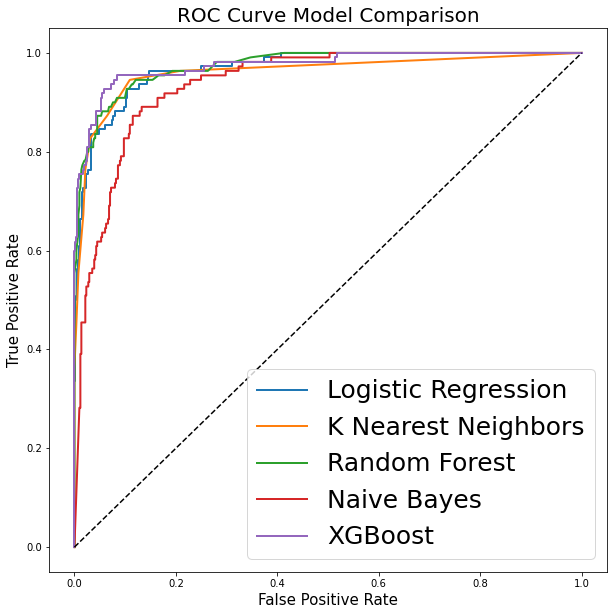

In [29]:
prob_lr=lr.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, thresholds=roc_curve(y_test, prob_lr)

prob_knn=knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn, thresholds=roc_curve(y_test, prob_knn)

prob_rf=rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds=roc_curve(y_test, prob_rf)

prob_nb=nb.predict_proba(X_test)[:,1]
fpr_nb, tpr_nb, thresholds=roc_curve(y_test, prob_nb)

prob_xg=xg.predict_proba(X_test)[:,1]
fpr_xg, tpr_xg, thresholds=roc_curve(y_test, prob_xg)

plt.figure(figsize = (10,10))
plt.plot(fpr_lr, tpr_lr, linewidth=2, label = 'Logistic Regression')
plt.plot(fpr_knn, tpr_knn, linewidth=2, label = 'K Nearest Neighbors')
plt.plot(fpr_rf, tpr_rf, linewidth=2, label = 'Random Forest')
plt.plot(fpr_nb, tpr_nb, linewidth=2, label = 'Naive Bayes')
plt.plot(fpr_xg, tpr_xg, linewidth=2, label = 'XGBoost')
plt.plot([0,1], [0,1], 'k--')

plt.legend(loc="lower right", fontsize = 25)
plt.title('ROC Curve Model Comparison', fontsize = 20)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)

In [30]:
cv_scores(rf)

Cross-Validation Accuracy Scores -> [95.98 92.37 95.18 93.57 90.76 91.97 94.38 95.58 95.58 95.56]
Minimum CV Accuracy: 90.76 %
Mean CV Accuracy:    94.09 %
Maximum CV Accuracy: 95.98 %


In [31]:
model_report(rf)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       513
           1       0.86      0.80      0.83       110

    accuracy                           0.94       623
   macro avg       0.91      0.89      0.90       623
weighted avg       0.94      0.94      0.94       623

Accuracy - Test:  94.22 %
Accuracy - Train: 100.0 %
Precision: 86.27
Recall:    80.0
F1 Score:  83.02
AUC-ROC:   97.38


In [32]:
model_report(xg)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       513
           1       0.87      0.80      0.83       110

    accuracy                           0.94       623
   macro avg       0.91      0.89      0.90       623
weighted avg       0.94      0.94      0.94       623

Accuracy - Test:  94.38 %
Accuracy - Train: 100.0 %
Precision: 87.13
Recall:    80.0
F1 Score:  83.41
AUC-ROC:   97.46


In [33]:
cv_scores(rf)

Cross-Validation Accuracy Scores -> [95.98 92.37 95.18 93.57 90.76 91.97 94.38 95.58 95.58 95.56]
Minimum CV Accuracy: 90.76 %
Mean CV Accuracy:    94.09 %
Maximum CV Accuracy: 95.98 %


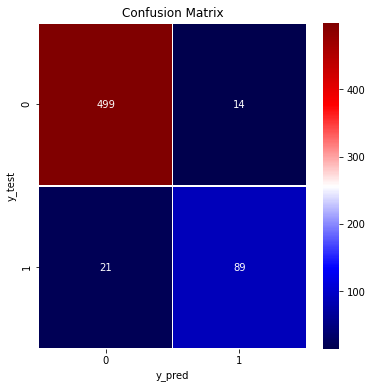

In [34]:
confusion_plot_threshold(rf) # default threshold to get regular confusion_plot function's output would be .51
# best 

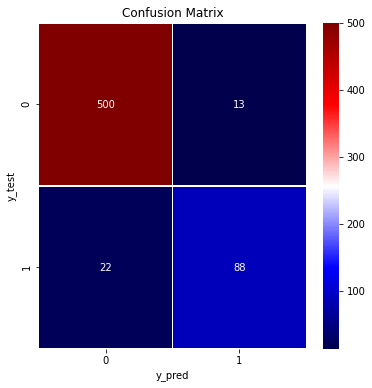

In [35]:
confusion_plot_threshold(xg) # default threshold to get regular confusion_plot function's output would be .5

# SHAP - Feature Importance

In [36]:
import shap

In [37]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

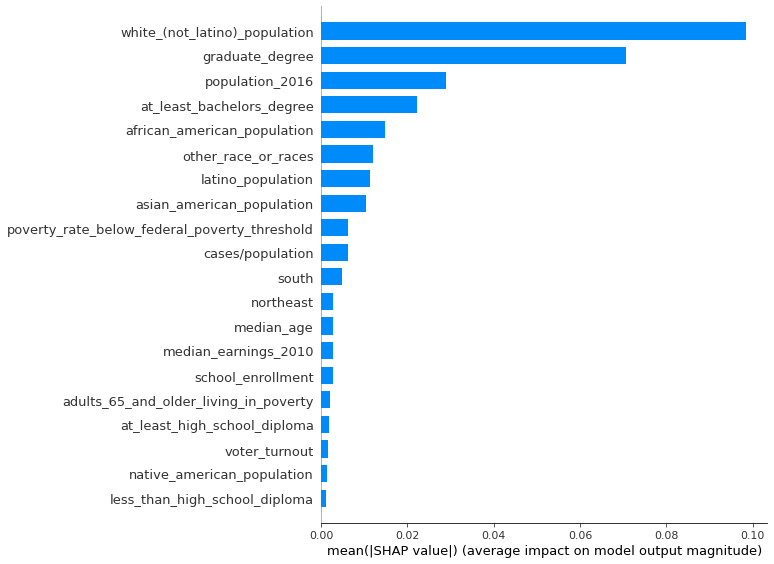

In [38]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

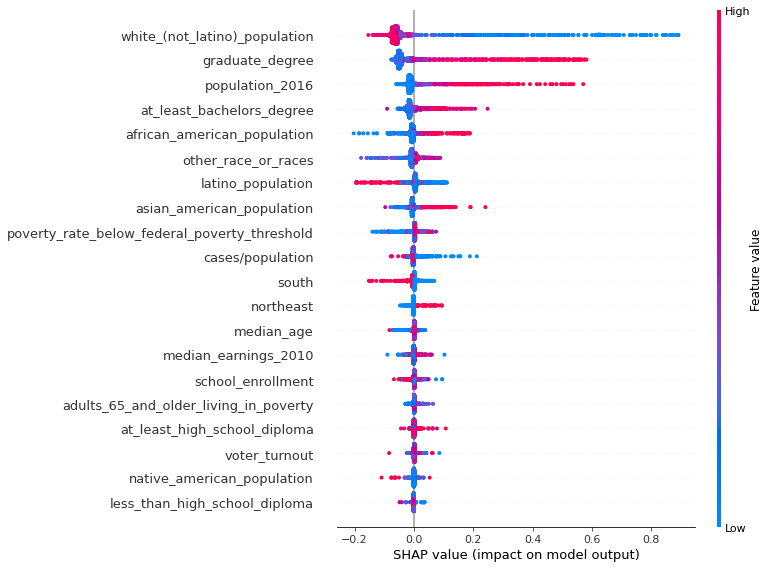

In [39]:
shap.summary_plot(shap_values, X_train)

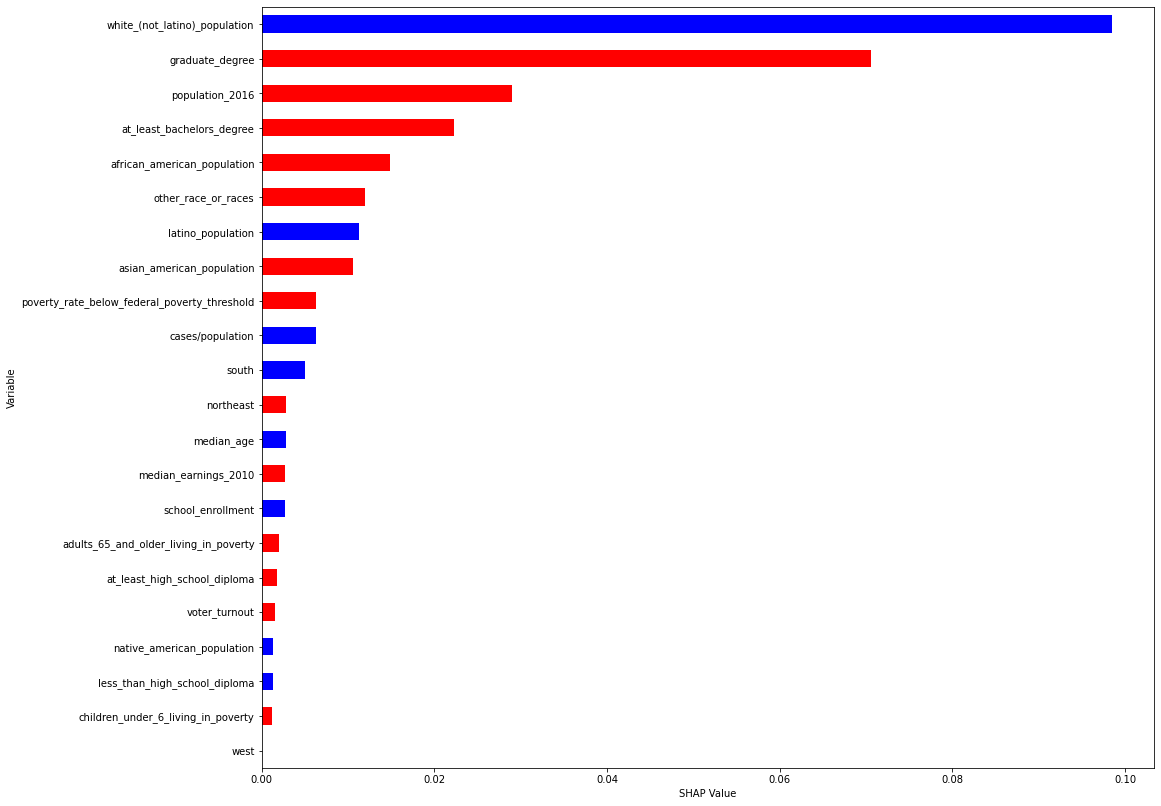

In [41]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    
    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(16,14),legend=False)
    ax.set_xlabel("SHAP Value")
    
ABS_SHAP(shap_values,X_train) 